In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [3]:
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

**The classsification algorithm that we can use**  
1) Logistic Regression \
2) SVC \
3) Addaboost \
4) SGDClassifier \
3) Descision Tree \
4) Random Forest \
5) Ensemble Methods \
6) BernolliNB \
7) PassiveaggressiveClassifier \
8) LGBM \
9) BaggingClassifier \
10) CalibratedClassifierCV

In [4]:
# Let's find shape of our data, So we have around 42000 images with 786 pixel
df.shape

(42000, 785)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='label', ylabel='Count'>

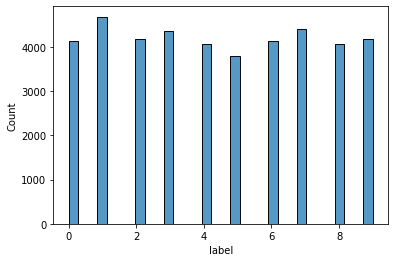

In [6]:
# Lets try to find out how sparse our dataset is, So we can see that data is eually distrubuted among all classes, So
# We don't need to balance classes
 
sns.histplot(data = df, x = 'label')

## Prepare dta to feed the ML algorithms

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('label', axis = 1), df['label'])


As our data is in the range 0-255, To scale our data into 0-1.  
We have to scale our dataset, So we have multiple ways to do that,  
I will mention most used one  
1) MinMaxScaler  
$ \frac {value - min(feature)}{max(feature) - min(feature)}$  

2) StandardScaler  
$ \frac {value - mean}{standard_deviation} $

So we don't need to use this scaling function , Just devide by 255 will work in our case

In [8]:
x_train = x_train/255.0
x_test = x_test/255.0

## Classification Algorithms


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

### Tensorflow

In [10]:
import tensorflow
from tensorflow import keras


In [11]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('label', axis = 1), df['label'])
x_train_valid, x_test_valid, y_train_valid, y_test_valid  = train_test_split(x_train, y_train)

In [12]:
x_train = x_train/255.0
x_test = x_test/255.0
x_train_valid = x_train_valid/255.0
x_test_valid = x_test_valid/255.0

In [13]:
model = keras.models.Sequential([
 keras.layers.Dense(400, activation = 'relu', input_shape = x_train.shape[1:]),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(200, activation="elu", kernel_initializer="he_normal"),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(10, activation="softmax")
])
model.compile(
    optimizer =  keras.optimizers.SGD(),
    loss = keras.losses.sparse_categorical_crossentropy,
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)

history = model.fit(x_train, y_train, epochs = 20, validation_data=(x_train_valid, y_train_valid))

Epoch 1/20
985/985 [==============================] - 8s 7ms/step - loss: 0.5934 - sparse_categorical_accuracy: 0.8211 - val_loss: 0.1566 - val_sparse_categorical_accuracy: 0.9572
Epoch 2/20
985/985 [==============================] - 5s 5ms/step - loss: 0.1853 - sparse_categorical_accuracy: 0.9457 - val_loss: 0.1010 - val_sparse_categorical_accuracy: 0.9726
Epoch 3/20
985/985 [==============================] - 5s 5ms/step - loss: 0.1304 - sparse_categorical_accuracy: 0.9634 - val_loss: 0.0694 - val_sparse_categorical_accuracy: 0.9817
Epoch 4/20
985/985 [==============================] - 5s 5ms/step - loss: 0.1022 - sparse_categorical_accuracy: 0.9711 - val_loss: 0.0520 - val_sparse_categorical_accuracy: 0.9869
Epoch 5/20
985/985 [==============================] - 5s 5ms/step - loss: 0.0769 - sparse_categorical_accuracy: 0.9781 - val_loss: 0.0369 - val_sparse_categorical_accuracy: 0.9908
Epoch 6/20
985/985 [==============================] - 5s 5ms/step - loss: 0.0617 - sparse_categorica

In [14]:
test = test/255.0

In [15]:
pred = np.argmax(model.predict(test), axis = 1)

In [16]:
sub = pd.DataFrame()
sub['ImageId'] = list(test.index)[1:] + [28000]
sub['Label'] = pred
sub.to_csv(r'/kaggle/working/sub_tens.csv', index = False)